In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import igraph as ig

import datetime
import dateutil.parser
import pytz

In [3]:
# Importando Dados
data = {}
courses = {
    "mat":"Matemática",
    "geo":"Geografia",
    "hist":"História",
    "port":"Português",
    "cie":"Ciências",
    "ing":"Inglês"
}
for i in range(1,10):
    for course in courses:
        if(i == 5): continue
        if (course == "ing" and i < 6): continue
        fileName = "./datasets/" + str(i) + "/" + course.upper() + str(i) + "-2000.csv"
        data[course+str(i)] = pd.read_csv(fileName)
        # data[course+str(i)]["disciplina"] = courses[course]
        # data[course+str(i)]["ano_escolar"] = i
        # data[course+str(i)]["datahora_num"] = data[course+str(i)]["datahora_resposta"].apply(lambda x : mpl.dates.date2num(pd.to_datetime(x[1:-1])))
        # data[course+str(i)] = data[course+str(i)].set_index("id_resposta")


for key in courses:
    if (key == "ing"): 
        data[key] = pd.concat([data[key+"6"],pd.concat([data[key+"7"],pd.concat([data[key+"8"],data[key+"9"]])])])
    else:
        data[key] = pd.concat([data[key+"1"],pd.concat([data[key+"2"],pd.concat([data[key+"3"],pd.concat([data[key+"4"],pd.concat([data[key+"6"],pd.concat([data[key+"7"],pd.concat([data[key+"8"],data[key+"9"]])])])])])])])
    
df = pd.concat([data["mat"],pd.concat([data["geo"],pd.concat([data["hist"],pd.concat([data["cie"],pd.concat([data["port"],data["ing"]])])])])])
# df = data["geo1"]
df = df.reset_index()
df.shape

(88000, 9)

<Axes: title={'center': 'Ocorrência das Questões no Dataset (1)'}, xlabel='id_questao', ylabel='Ocorrência'>

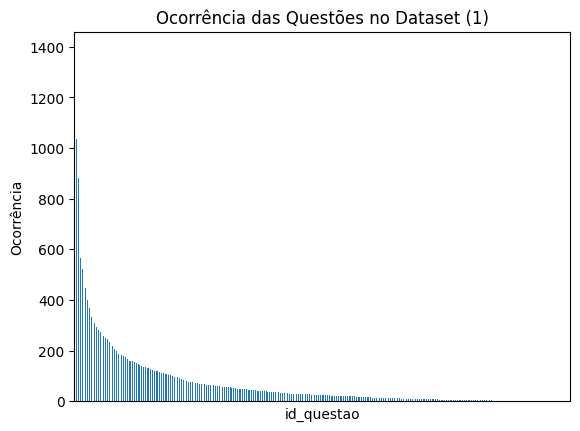

In [4]:
df["id_questao"].value_counts().plot(kind='bar', ylabel="Ocorrência", xticks=[], title="Ocorrência das Questões no Dataset (1)")

<Axes: title={'center': 'Ocorrência das Questões no Dataset (1) \n Apenas as 600 Questões menos frequentes'}, xlabel='id_questao', ylabel='Ocorrência'>

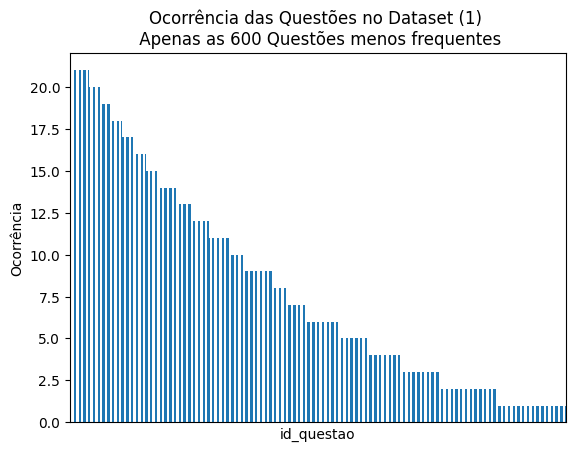

In [5]:
df["id_questao"].value_counts().tail(600).plot(kind='bar', ylabel="Ocorrência", xticks=[], title="Ocorrência das Questões no Dataset (1) \n Apenas as 600 Questões menos frequentes")

<Axes: title={'center': 'Ocorrência das Questões (loglog)'}, xlabel='id_questao', ylabel='Ocorrência'>

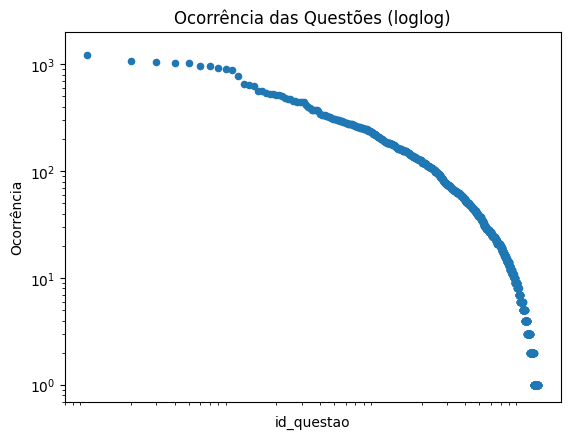

In [6]:
df3 = pd.DataFrame(df["id_questao"].value_counts()).reset_index()
df3.plot(kind='scatter',x="id_questao",y="count",
         title="Ocorrência das Questões (loglog)",
         ylabel="Ocorrência", loglog=True, xticks=[])

In [37]:
# 3 casos com tempo resposta negativo
df = df.drop(df.index[df['tempo_resposta'] < 0])
df.head(5)

,index,id_topico,nome_topico,id_questao,habilidades_bncc,id_resposta,acerto_resposta,tempo_resposta,datahora_resposta
0,0,d266ce9e-00eb-45e6-8c2b-9e5a8c2da5ad,Coleta e organização de informações,97d7fef3-14a3-496b-91e3-85992b591624,[EF02MA22],53749d0b-d73f-4c17-9967-3dd463d4c1c6,1.0,8.0,"""2023-03-02T18:29:24.501000000-03:00"""
1,1,d266ce9e-00eb-45e6-8c2b-9e5a8c2da5ad,Coleta e organização de informações,97d7fef3-14a3-496b-91e3-85992b591624,[EF02MA22],08a04a1a-402d-48b9-bb6e-3eee617d37c9,1.0,45.0,"""2023-03-02T18:27:30.427000000-03:00"""
2,2,d266ce9e-00eb-45e6-8c2b-9e5a8c2da5ad,Coleta e organização de informações,97d7fef3-14a3-496b-91e3-85992b591624,[EF02MA22],af7f4641-1ffd-4230-8729-f48a0c62663a,1.0,125.0,"""2023-03-01T20:37:17.551000000-03:00"""
3,3,d266ce9e-00eb-45e6-8c2b-9e5a8c2da5ad,Coleta e organização de informações,97d7fef3-14a3-496b-91e3-85992b591624,[EF02MA22],732eb485-0bf4-4741-86fe-702ee2870442,1.0,41.0,"""2023-03-01T20:13:35.245000000-03:00"""
4,4,d266ce9e-00eb-45e6-8c2b-9e5a8c2da5ad,Coleta e organização de informações,97d7fef3-14a3-496b-91e3-85992b591624,[EF02MA22],55016c6f-6c22-42dc-83b3-dd9f749bba12,1.0,6.0,"""2023-02-28T11:15:54.740000000-03:00"""


<Axes: title={'center': 'Ocorrência dos Tempos de Resposta no Dataset (1) \n Primeiros 250 tempos mais frequentes'}, xlabel='tempo_resposta', ylabel='Ocorrência'>

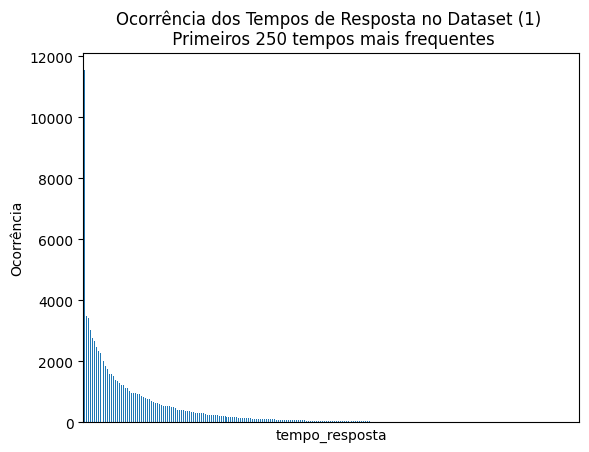

In [9]:
df["tempo_resposta"].value_counts().head(250).plot(kind='bar', ylabel="Ocorrência", xticks=[], title="Ocorrência dos Tempos de Resposta no Dataset (1) \n Primeiros 250 tempos mais frequentes")

<Axes: title={'center': 'Ocorrência dos Tempos de Resposta (loglog)'}, xlabel='tempo_resposta', ylabel='Ocorrência'>

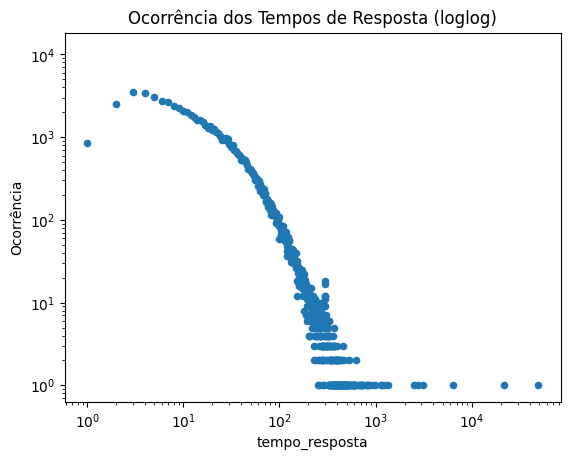

In [68]:
df4 = pd.DataFrame(df["tempo_resposta"].value_counts()).reset_index()
# df["tempo_resposta"].value_counts().head(50).plot(kind='bar', ylabel="Frequência de ocorrência")
# .tail(-1) pois df["tempo_resposta"] == 0.0 é muito frequente
df4.plot(kind='scatter',x="tempo_resposta",y="count",
         title="Ocorrência dos Tempos de Resposta (loglog)",
         ylabel="Ocorrência", loglog=True)

<Axes: title={'center': 'Ocorrência dos Tempos de Resposta (loglog)'}, xlabel='tempo_resposta', ylabel='Ocorrência'>

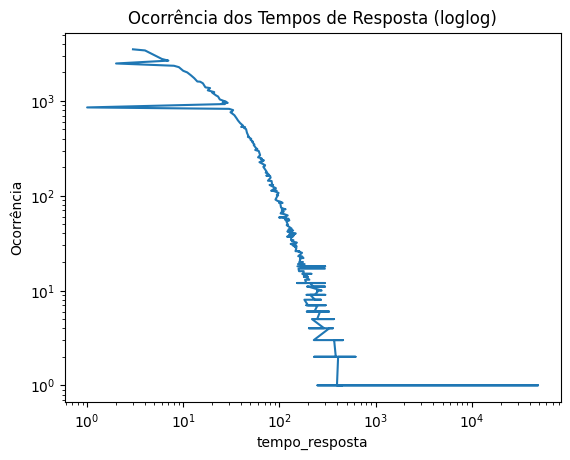

In [73]:
df["tempo_resposta"].value_counts().tail(-1).plot(kind='line',
        title="Ocorrência dos Tempos de Resposta (loglog)",
        ylabel="Ocorrência", loglog=True)
# .tail(-1) pois df["tempo_resposta"] == 0.0 é muito frequente


In [ ]:
# .tail(-1) pois df["tempo_resposta"] == 0.0 é muito frequente
df["tempo_resposta"].value_counts().tail(-1).head(300).plot(kind='bar', ylabel="Frequência de ocorrência", xticks=[])
# df["tempo_resposta"].value_counts().tail(-1).plot(kind='bar', ylabel="Frequência de ocorrência")

In [236]:
pd.scatter(x=df["tempo_resposta"].value_counts().index, y=df["tempo_resposta"].value_counts())

AttributeError: module 'pandas' has no attribute 'scatter'

In [226]:
df["tempo_resposta"].value_counts().plot(kind='scatter', ylabel="Frequência de ocorrência", loglog=True)

ValueError: scatter requires an x and y column

In [188]:
df["tempo_resposta"].sort_values()

id_resposta
f0d9c4a1-29b9-484b-86d8-2be9f77bfca0        0.0
0768d835-670b-4632-8aa6-514d1e09f99f        0.0
c619ab80-bc2f-48a4-a0e1-e12aaedab19b        0.0
a9f1873b-5a0e-4c6f-bbc5-f48efd0dc791        0.0
cfda394b-f3d0-43bb-b930-4783cd8c6d06        0.0
                                         ...   
3bf1bce8-fbac-44d4-887f-4331dc92f9cb     2747.0
ee05d611-f375-4175-89d5-bd6f057ce435     3093.0
aba85ba0-799b-4c5e-9cde-4f3d0eeeb1ec     6424.0
8c16302e-13bc-4fc0-8f42-ae929e8401d9    21848.0
ca8303e7-1bd4-4e8d-8107-e1ceda09f0c7    48992.0
Name: tempo_resposta, Length: 87997, dtype: float64

In [189]:
def createGraph(n_vertices, edges, weights):
    g = ig.Graph(n_vertices, edges)
    g["title"] = "Coocorrência de Questões"
    g.es["weights"] = weights
    return g

<Axes: xlabel='id_resposta', ylabel='Distância temporal'>

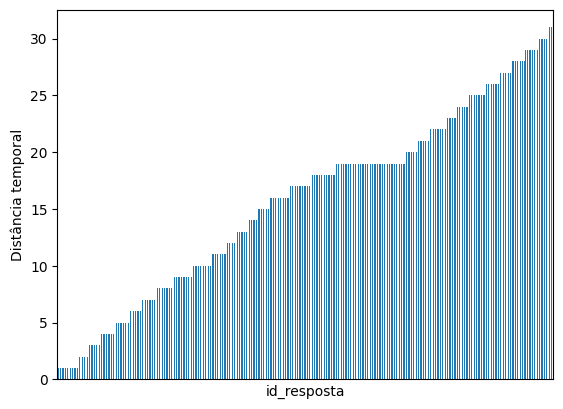

In [213]:
df["datahora_resposta"].apply( lambda a : pd.to_datetime(a[1:-1]).day ).sort_values(
    ).plot(
        kind='bar',
        ylabel="Distância temporal",
        xticks=[])

In [248]:
1267 * 1267-1

1267

In [252]:
import datetime
import dateutil.parser
import pytz
def findCoocurrenceOfQuestions(df, time_threshold, rows_threshold):
    count = 0
    edges = []
    weights = []
    for i in df.index:
        for j in df.index:
            if count > rows_threshold: break
            ti = pd.to_datetime(df["datahora_resposta"][i][1:-1])
            tj = pd.to_datetime(df["datahora_resposta"][j][1:-1])
            edges.append((i,j))
            diff = abs(ti - tj)
            weights.append(diff)
            count += 1
    return edges, weights

edges, weights = findCoocurrenceOfQuestions(df, 1000,1000)
len(edges)


1001

In [ ]:
def createGraph(n_vertices, edges, weights):
    g = ig.Graph(n_vertices, edges)
    g["title"] = "Coocorrência de Questões"
    g.es["weights"] = weights
    return g

createGraph(len(df["id_questao"].unique()),edges, weights)

In [244]:
df[(df.index == '53749d0b-d73f-4c17-9967-3dd463d4c1c6') | (df.index == '55016c6f-6c22-42dc-83b3-dd9f749bba12')]

,id_topico,nome_topico,id_questao,habilidades_bncc,acerto_resposta,tempo_resposta,datahora_resposta,disciplina,ano_escolar
id_resposta,,,,,,,,,
53749d0b-d73f-4c17-9967-3dd463d4c1c6,d266ce9e-00eb-45e6-8c2b-9e5a8c2da5ad,Coleta e organização de informações,97d7fef3-14a3-496b-91e3-85992b591624,[EF02MA22],1.0,8.0,"""2023-03-02T18:29:24.501000000-03:00""",Matemática,1
55016c6f-6c22-42dc-83b3-dd9f749bba12,d266ce9e-00eb-45e6-8c2b-9e5a8c2da5ad,Coleta e organização de informações,97d7fef3-14a3-496b-91e3-85992b591624,[EF02MA22],1.0,6.0,"""2023-02-28T11:15:54.740000000-03:00""",Matemática,1


In [ ]:
def readGraph(df):
    edges = []
    weights = []
    for line in df:
        edges.append((int(line[0]), int(line[1])))
        weights.append(int(line[2]))
    num_vertices = findMax(edges)
    return num_vertices, edges, weights

In [21]:
n_vertices = len(df["id_questao"].unique())
edges = 
weights = 